In [117]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
import glob, os
import seaborn as sns
import scipy.optimize as opt
from scipy.io import loadmat
import scipy
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin

In [57]:
#import data
data = pd.read_csv("suicides.csv")
print(data.head())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

In [58]:
#drop two useless columns
data=data.drop(["country-year", "HDI for year"], axis = 1)

In [59]:
#print(data.head())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop  gdp_for_year ($)   gdp_per_capita ($)       generation  
0               6.71      2,156,624,900                 796     Generation X  
1               5.19      2,156,624,900                 796           Silent  
2               4.83      2,156,624,900                 796     Generation X  
3               4.59      2,156,624,900                 796  G.I. Generation  
4               3.28      2,156,624,900                 796          Boomers  


In [60]:
#rename columns
data = data.rename(columns = {"suicides/100k pop" : "suicides_100k", " gdp_for_year ($) ": "gdp_year", "gdp_per_capita ($)" : "gdp_per_capita"})
print(data.head())

   country  year     sex          age  suicides_no  population  suicides_100k  \
0  Albania  1987    male  15-24 years           21      312900           6.71   
1  Albania  1987    male  35-54 years           16      308000           5.19   
2  Albania  1987  female  15-24 years           14      289700           4.83   
3  Albania  1987    male    75+ years            1       21800           4.59   
4  Albania  1987    male  25-34 years            9      274300           3.28   

        gdp_year  gdp_per_capita       generation  
0  2,156,624,900             796     Generation X  
1  2,156,624,900             796           Silent  
2  2,156,624,900             796     Generation X  
3  2,156,624,900             796  G.I. Generation  
4  2,156,624,900             796          Boomers  


In [61]:
#recode variables into numericals
data["sex"] = data.sex.map({"male" : -1, "female" : 1})
data["age"] = data.age.map({"5-14 years" : 0,"15-24 years":1, "25-34 years" : 2, "35-54 years":3, "55-74 years":4, "75+ years":5})
data["generation"] = data.generation.map({"Generation Z":0, "Millenials" : 1, "Generation X":2, "Boomers":3, "Silent":4, "G.I. Generation" : 5})
print(data.head())

   country  year  sex  age  suicides_no  population  suicides_100k  \
0  Albania  1987   -1    1           21      312900           6.71   
1  Albania  1987   -1    3           16      308000           5.19   
2  Albania  1987    1    1           14      289700           4.83   
3  Albania  1987   -1    5            1       21800           4.59   
4  Albania  1987   -1    2            9      274300           3.28   

        gdp_year  gdp_per_capita  generation  
0  2,156,624,900             796           2  
1  2,156,624,900             796           4  
2  2,156,624,900             796           2  
3  2,156,624,900             796           5  
4  2,156,624,900             796           3  


In [62]:
#create subdata sets
usa = data[data["country"] == "United States"]
iceland = data[data["country"] == "Iceland"]
rok = data[data["country"] == "Republic of Korea"]

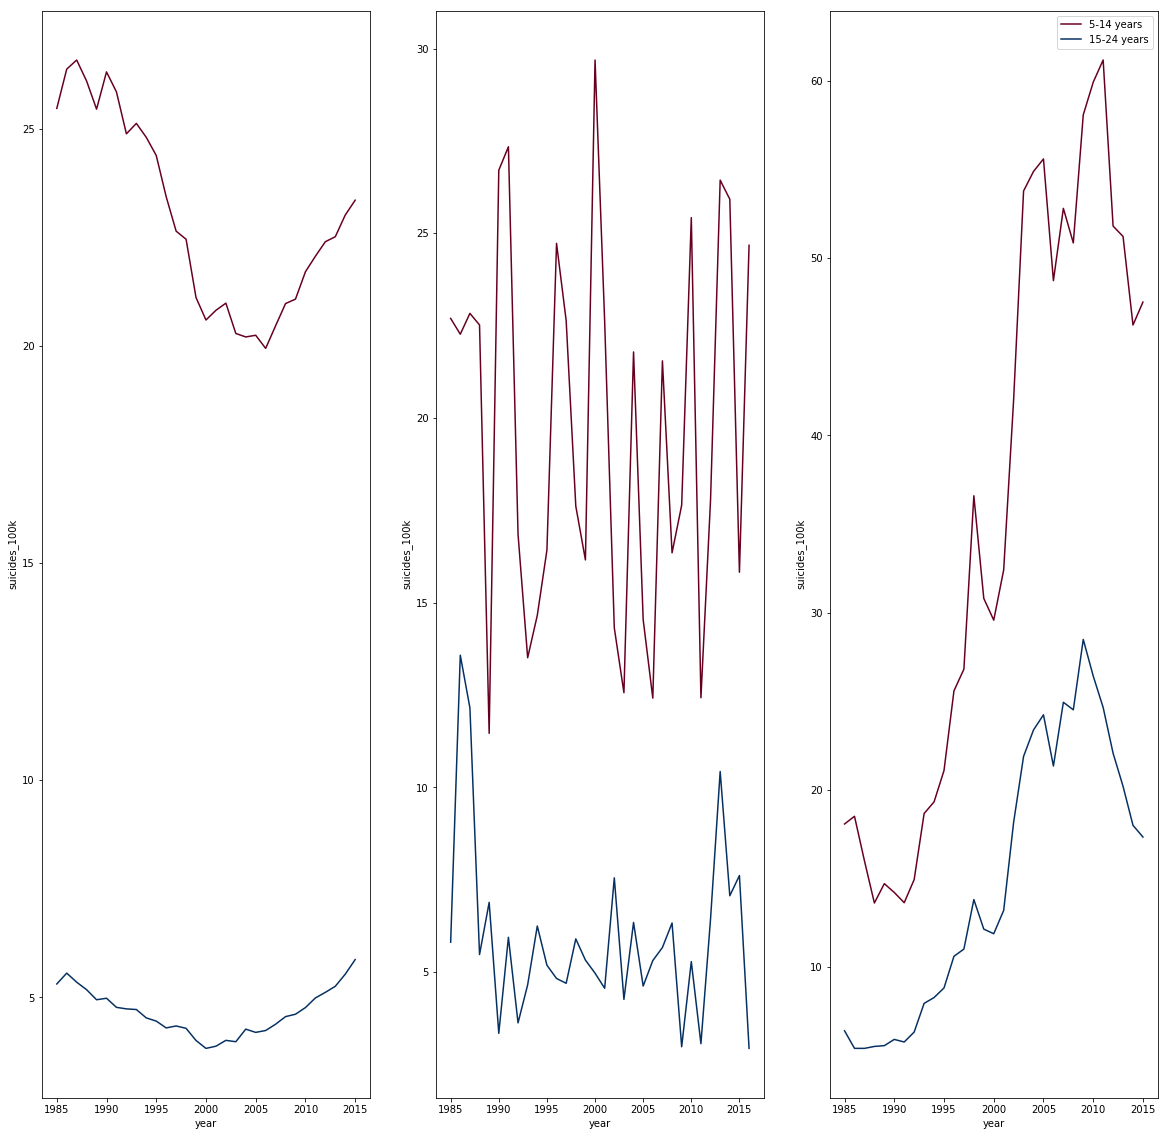

In [63]:
#plot suicide rates for each country
fig, axs = plt.subplots(1,3, figsize = (20,20))
axs[0] = sns.lineplot(x = "year", y ="suicides_100k", data = usa, hue = "sex", palette = "RdBu", ci = None, ax = axs[0], legend = False)
axs[1] = sns.lineplot(x = "year", y ="suicides_100k", data = iceland, hue = "sex", palette = "RdBu", ci = None, ax = axs[1], legend = False)
axs[2] = sns.lineplot(x = "year", y ="suicides_100k", data = rok, hue = "sex", palette = "RdBu", ci = None, ax = axs[2], legend = False)

plt.legend(["5-14 years","15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
#plt.xlabel("Year")
#plt.ylabel("Suicides per 100k")
#plt.title("Suicides per 100k in the Republic of Korea")
plt.show()

In [89]:
#dataframe with all countries we want to look at
data3 = data[data["country"].isin(["United States", "Iceland", "Republic of Korea", "Canada", "Brazil", "Russian Federation"])] 

In [96]:
#building a mixed effects model using the statsmodel library 
#suicides predicted by age and sex, from dataframe data3, with country as a grouping variable and random effects for age and sex as well

md = smf.mixedlm("suicides_100k ~ age*sex", data3, groups=data3["country"], re_formula="~age*sex")
mdf = md.fit()
print(mdf.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  suicides_100k
No. Observations:   2170     Method:              REML         
No. Groups:         6        Scale:               150.5660     
Min. group size:    324      Likelihood:          -8549.2772   
Max. group size:    382      Converged:           Yes          
Mean group size:    361.7                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             4.533    2.278  1.990 0.047  0.068  8.999
age                   5.182    1.770  2.927 0.003  1.712  8.652
sex                  -3.076    2.015 -1.527 0.127 -7.025  0.873
age:sex              -2.816    0.889 -3.167 0.002 -4.558 -1.073
Group Var            29.820    1.714                           
Group x age Cov      -7.043    0.952                 

C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2066: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [66]:
# model for each country (these models don't make much sense, I have not looked at them much)

md_usa = smf.mixedlm("suicides_100k ~ age*sex", usa, groups=usa["year"])
mdf_usa = md_usa.fit()
print(mdf_usa.summary())

md_iceland = smf.mixedlm("suicides_100k ~ age*sex", iceland, groups=iceland["year"])
mdf_iceland = md_iceland.fit()
print(mdf_iceland.summary())

md_rok = smf.mixedlm("suicides_100k ~ age*sex", rok, groups=rok["year"])
mdf_rok = md_rok.fit()
print(mdf_rok.summary())

C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: suicides_100k
No. Observations: 372     Method:             REML         
No. Groups:       31      Scale:              19.4720      
Min. group size:  12      Likelihood:         -1092.8227   
Max. group size:  12      Converged:          No           
Mean group size:  12.0                                     
-----------------------------------------------------------
              Coef.  Std.Err.   z    P>|z|  [0.025   0.975]
-----------------------------------------------------------
Intercept    -92.580   92.140 -1.005 0.315 -273.172  88.012
age          114.345   29.956  3.817 0.000   55.633 173.058
sex           31.850   90.696  0.351 0.725 -145.910 209.610
age:sex      -86.331   29.956 -2.882 0.004 -145.044 -27.619
year           0.048    0.046  1.050 0.294   -0.042   0.139
age:year      -0.055    0.015 -3.688 0.000   -0.085  -0.026
sex:year      -0.017    0.045 -0.370 0.711   -0.106

C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: suicides_100k
No. Observations:  382     Method:             REML         
No. Groups:        32      Scale:              118.7723     
Min. group size:   10      Likelihood:         -1459.6458   
Max. group size:   12      Converged:          No           
Mean group size:   11.9                                     
------------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
------------------------------------------------------------
Intercept     112.978  220.783  0.512 0.609 -319.749 545.706
age            -1.336   71.736 -0.019 0.985 -141.936 139.264
sex          -273.322  218.789 -1.249 0.212 -702.139 155.496
age:sex       110.161   71.725  1.536 0.125  -30.418 250.740
year           -0.053    0.110 -0.477 0.634   -0.269   0.164
age:year        0.002    0.036  0.047 0.963   -0.069   0.072
sex:year        0.134    0.109  1.22

C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   suicides_100k
No. Observations:   372       Method:               REML         
No. Groups:         31        Scale:                212.8059     
Min. group size:    12        Likelihood:           -1537.6803   
Max. group size:    12        Converged:            No           
Mean group size:    12.0                                         
-----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|   [0.025    0.975] 
-----------------------------------------------------------------
Intercept     1135.929  349.917   3.246 0.001   450.104  1821.755
age          -1423.214   99.030 -14.372 0.000 -1617.309 -1229.119
sex           -767.524  299.828  -2.560 0.010 -1355.176  -179.872
age:sex        680.097   99.030   6.868 0.000   486.002   874.192
year            -0.570    0.175  -3.259 0.001    -0.913    -0.227
age:year         0.718  

C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Mario\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)


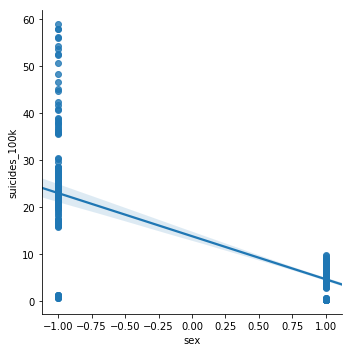

In [70]:
#plots to look at the linear trend in the data
sns.lmplot(x = "sex", y = "suicides_100k", data = usa)

C:\Users\Mario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


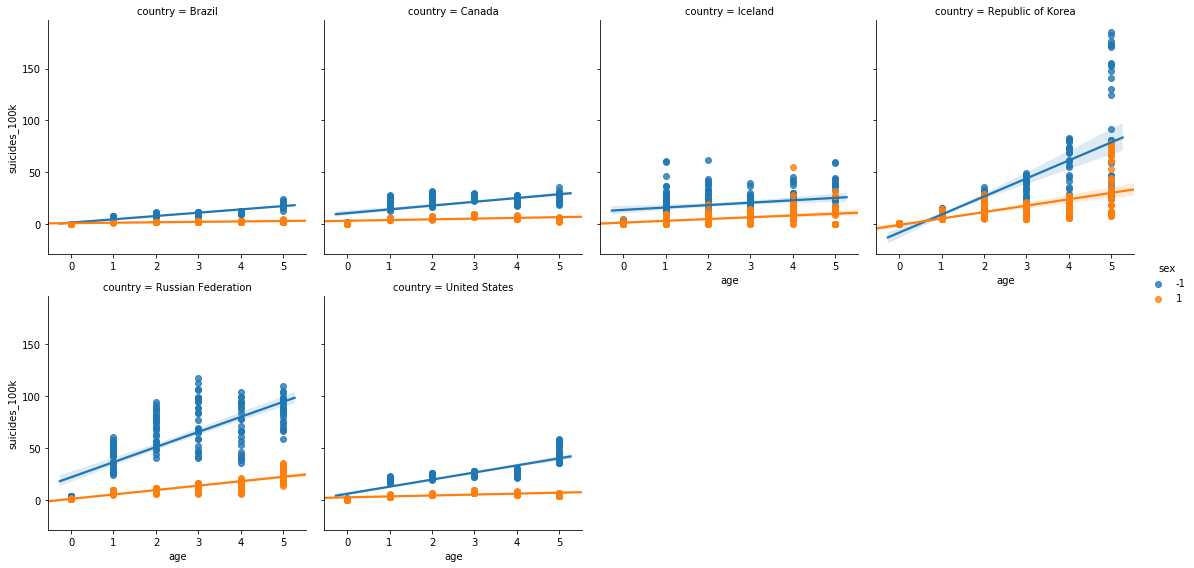

In [91]:
#linear regression plots for predicting suicides by age, separate for sex in different countries
grid = sns.lmplot(x = "age", y = "suicides_100k", hue = "sex", col = "country", sharex=False, col_wrap = 4, data = data3, height=4)

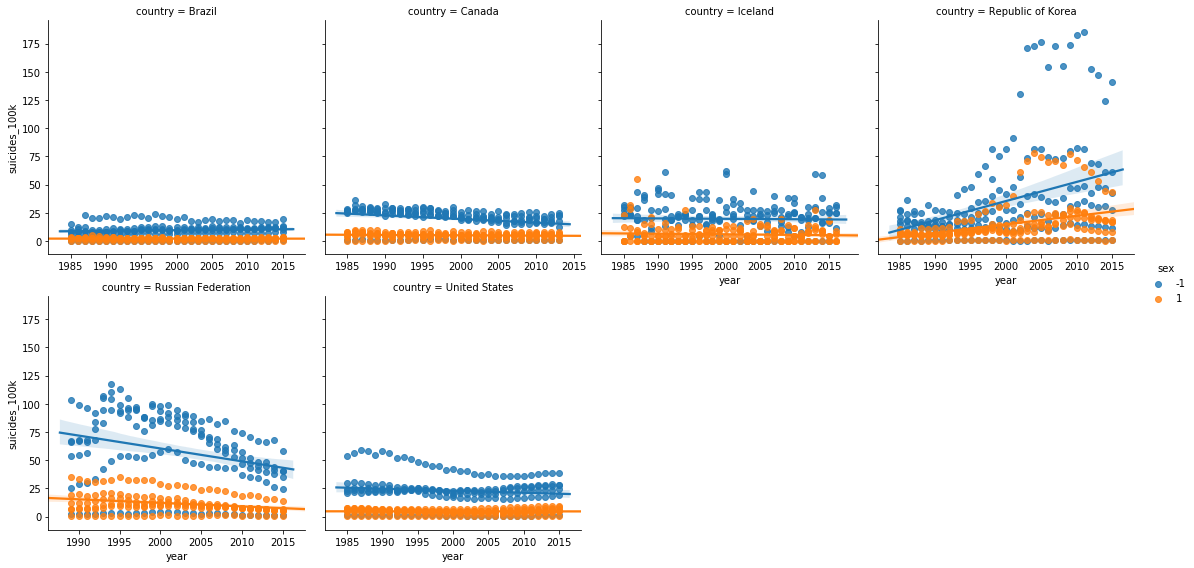

In [97]:
#linear regression plots for predicting suicides by year, separate for sex in different countries
grid = sns.lmplot(x = "year", y = "suicides_100k", hue = "sex", col = "country", sharex=False, col_wrap = 4, data = data3, height=4)

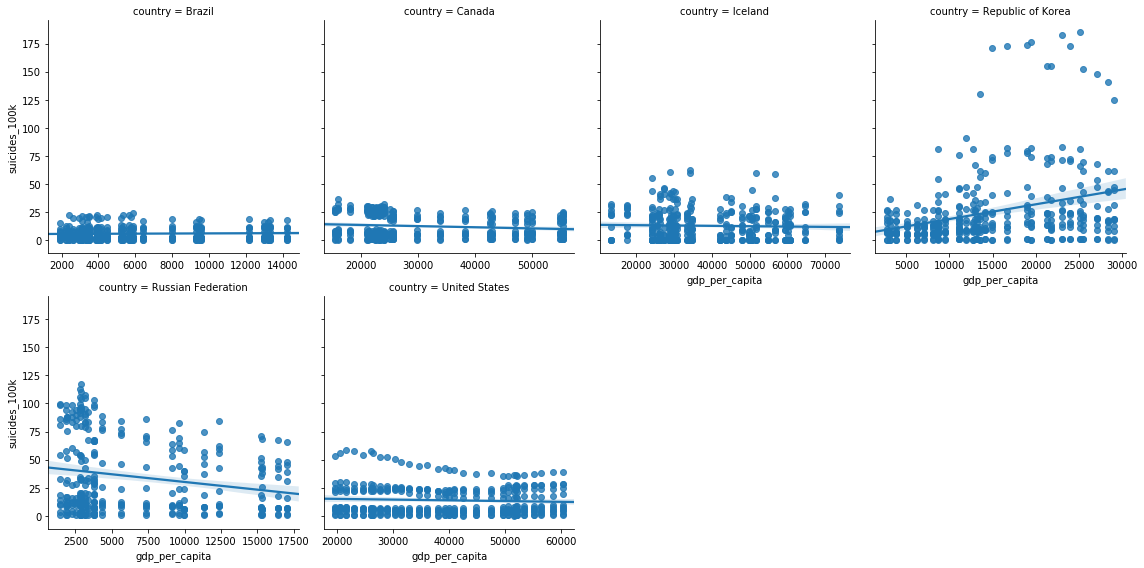

In [101]:
#linear regression plots for predicting suicides by gdp in different countries
grid = sns.lmplot(x = "gdp_per_capita", y = "suicides_100k",  col = "country", sharex=False, col_wrap = 4, data = data3, height=4)

In [110]:
#the rest of this file averages the gdp of all countries over the years (data 4) and then sorts them from small to big
data4 = data.groupby(["country"]).mean()

In [111]:
print(data4)

                                     year  sex       age  suicides_no  \
country                                                                 
Albania                       1999.227273  0.0  2.500000     7.462121   
Antigua and Barbuda           1999.481481  0.0  2.500000     0.033951   
Argentina                     2000.000000  0.0  2.500000   221.018817   
Armenia                       2002.791946  0.0  2.516779     6.392617   
Aruba                         2004.285714  0.0  2.500000     0.601190   
Australia                     1999.833333  0.0  2.500000   194.752778   
Austria                       2000.418848  0.0  2.513089   131.081152   
Azerbaijan                    1997.625000  0.0  2.500000     8.625000   
Bahamas                       2001.521739  0.0  2.500000     0.336957   
Bahrain                       2002.809524  0.0  2.500000     1.837302   
Barbados                      1999.240000  0.0  2.500000     0.590000   
Belarus                       2001.095238  0.0  2.5

In [114]:
data5 = data4.sort_values(by=['gdp_per_capita'])

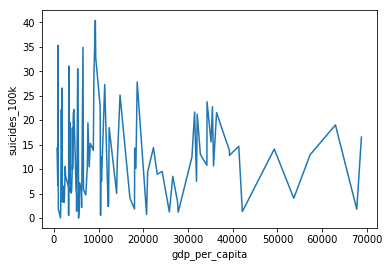

In [115]:
sns.lineplot(x = "gdp_per_capita", y ="suicides_100k", data = data5)

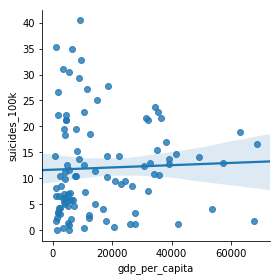

In [116]:
#linear regression plot for predicting suicides by average gdp of all countries countries
sns.lmplot(x = "gdp_per_capita", y = "suicides_100k", data = data5, height=4)